# CNN's for Image Classification using Fast.ai Library

This code was created for the talk: CCN utilizando fast.ai

The main objective is a classification model creation trained in Lego brick dataset extracted from [kaggle](https://www.kaggle.com/joosthazelzet/lego-brick-images).







## Setup fast.ai enviroment

In [0]:
#installing the packages
!pip3 install fastai torchvision-nightly
!pip3 install fastai fastai

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
#loading the packages
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import Image

In [0]:
#verifying the GPU is avaliabale
torch.cuda.is_available()

## Unzip dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#unzip
!unzip /content/lego-brick-images.zip

## Exploring the dataset

In [0]:
PATH = "/content/LEGO brick images/"

In [0]:
os.listdir(PATH)

['train', 'models', 'valid']

In [0]:
files = os.listdir(f'{PATH}valid/3022 Plate 2x2')[:10]
files

['201706161906-0200.png',
 '201706161906-0160.png',
 '201706161906-0269.png',
 '201706161906-0190.png',
 '201706161906-0126.png',
 '201706161906-0032.png',
 '201706161906-0214.png',
 '201706161906-0156.png',
 '201706161906-0380.png',
 '201706161906-0374.png']

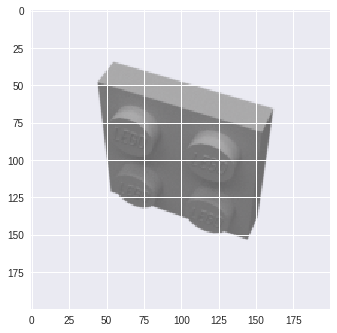

In [0]:
img = plt.imread(f'{PATH}valid/3022 Plate 2x2/{files[0]}')
plt.imshow(img)

In [0]:
img.shape

(200, 200, 4)

In [0]:
img.size

160000

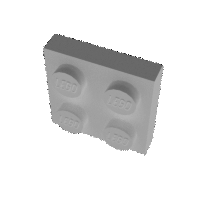

In [0]:
open_mask(f'{PATH}valid/3022 Plate 2x2/{files[0]}')

## Training the last layer

In [0]:
#databunch creation
bs = 64
data = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=224, bs = bs).normalize(imagenet_stats)

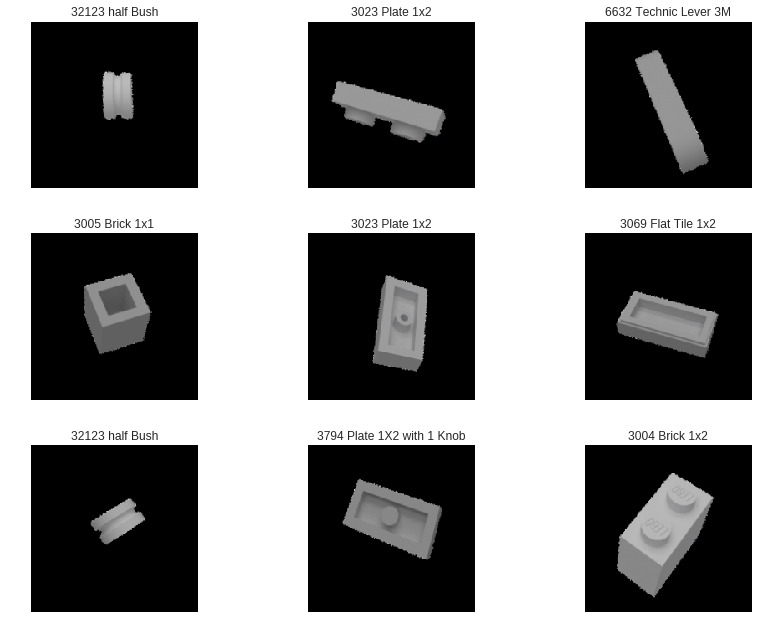

In [0]:
#showing some images of the databunch
data.show_batch(rows = 3, figsize= (12,9))

In [0]:
#model creation
learn = create_cnn(data, models.resnet34, metrics=[accuracy,error_rate])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


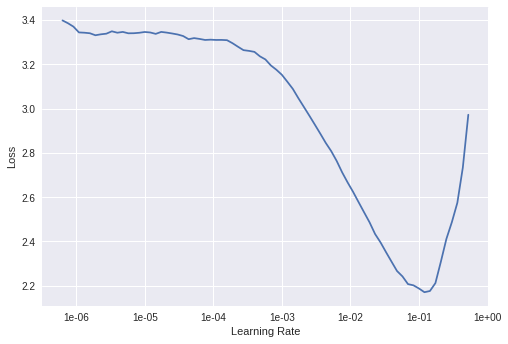

In [21]:
#finding the optimal learning rate
ln = learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 1e-1 / 2
n_epoch = 3

In [23]:
learn.fit_one_cycle(n_epoch, max_lr=slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
1,1.034538,1.639302,0.685531,0.314469,01:38
2,0.646930,0.157310,0.944976,0.055024,01:38
3,0.276020,0.074462,0.966296,0.033704,01:38


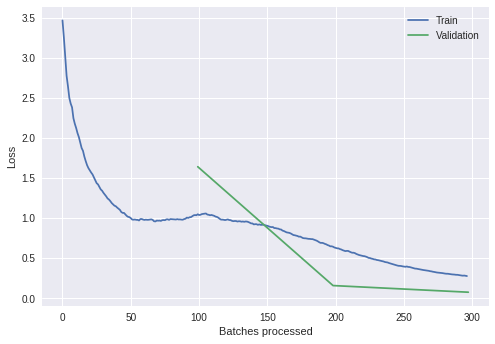

In [24]:
learn.recorder.plot_losses()

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


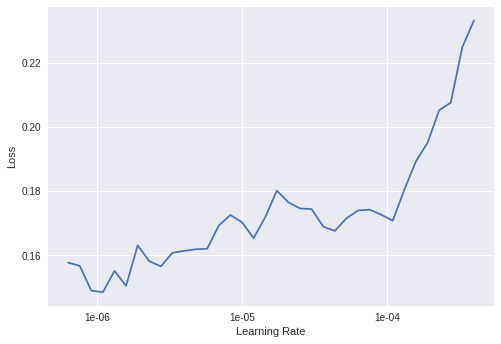

In [27]:
ln = learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,error_rate,time
1,0.174329,0.067744,0.973664,0.026336,01:37
2,0.127002,0.042297,0.982756,0.017244,01:37


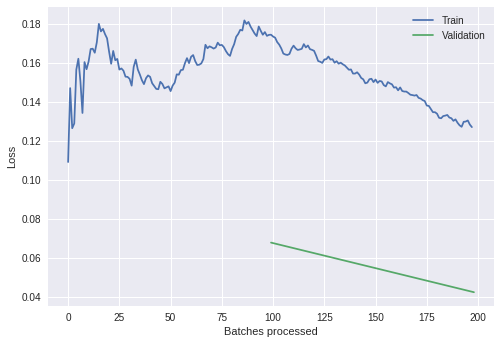

In [29]:
#training the model with the new learning rate
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))
learn.recorder.plot_losses()

In [0]:
#saving the layer
learn.save('stage-2')

In [31]:
#creating the interperter

interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

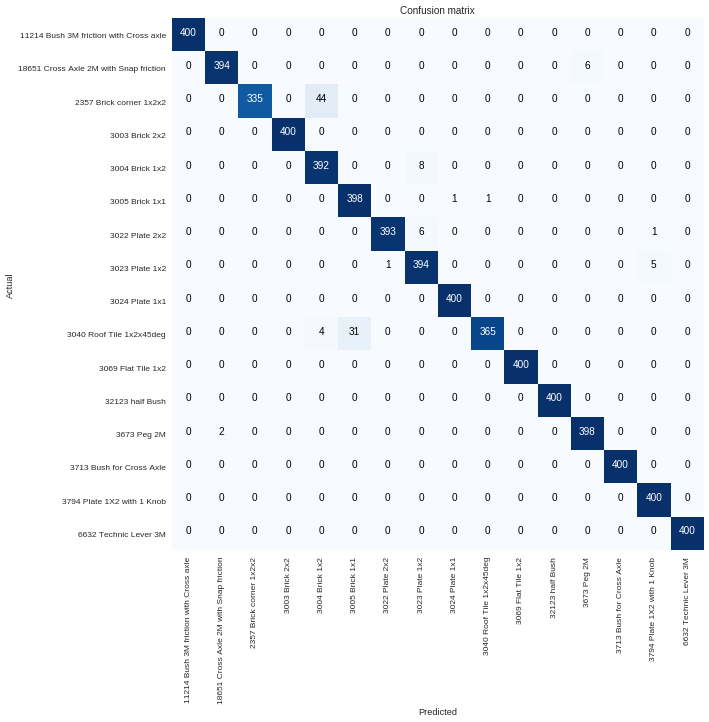

In [32]:
#confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

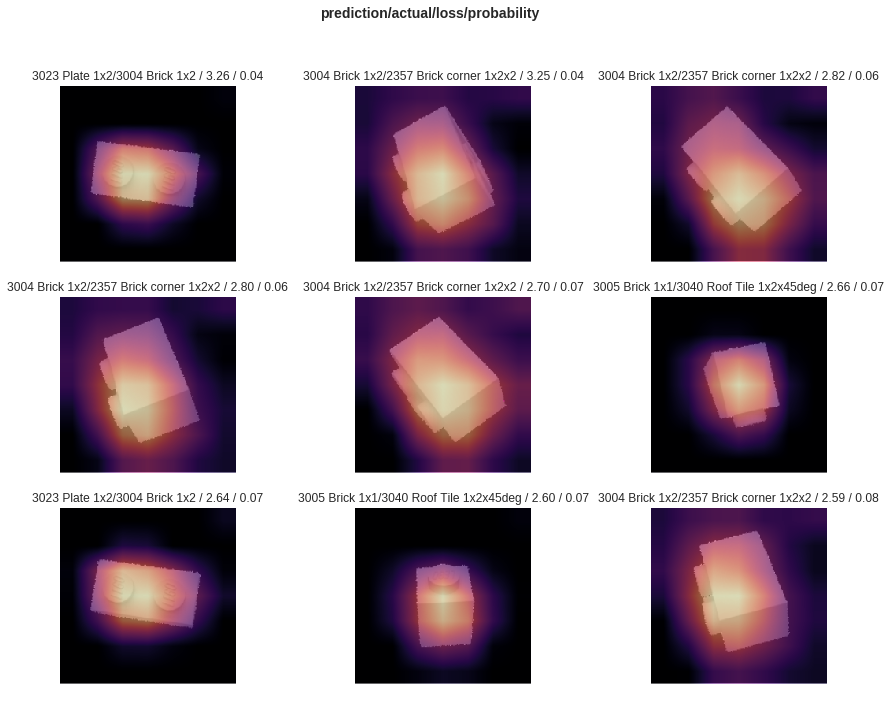

In [35]:
#plotting top_loses

interp.plot_top_losses(9, figsize=(15,11))